In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch as torch
import torch.nn as nn

In [2]:
from google.colab import files # 11mins
uploaded = files.upload()

Saving df1_test.csv to df1_test.csv
Saving df2_test.csv to df2_test.csv
Saving targets_test.csv to targets_test.csv


In [4]:
from google.colab import files # 11mins
uploaded = files.upload()

Saving trained_sample.pth to trained_sample.pth


In [5]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(20, 16)
        self.fc2 = nn.Linear(16, 9)
        self.fc3 = nn.Linear(9, 3)
        self.fc4 = nn.Linear(3, 1)
        self.sigmoid = nn.Sigmoid()
        self.relu = nn.ReLU()
        self.criterion = nn.MSELoss()
        self.optimizer = torch.optim.SGD(self.parameters(), lr=0.01)



    def forward(self, x1, x2):
        # Element-wise subtraction
        x = x1 - x2
        # Forward pass with shared weights
        x = self.sigmoid(self.fc1(x))
        x = self.sigmoid(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        x = self.fc4(x)
        return x

    def loss(self, output, target):
        return self.criterion(output, target)

    def backward(self, loss):
        loss.backward()

    def train(self, x1, x2, target):
        # Forward pass
        output = self.forward(x1, x2)
        # Compute the loss
        loss = self.loss(output, target)
        # Zero the gradients
        self.optimizer.zero_grad()
        # Backward pass
        self.backward(loss)
        # Update the weights
        self.optimizer.step()
        return loss



In [6]:
# IF GPU is availible
# model = torch.load("trained_sample.pth")

#if no GPU
model = torch.load("trained_sample.pth", map_location=torch.device('cpu'))

# Data loading

In [7]:
input_x1 = pd.read_csv('df1_test.csv')
input_x2 = pd.read_csv('df2_test.csv')
target_y = pd.read_csv('targets_test.csv')

# Drop the first column
# input_x1 = input_x1.drop(input_x1.columns[0], axis=1)
# input_x2 = input_x2.drop(input_x2.columns[0], axis=1)
target_y = target_y.drop(target_y.columns[1], axis=1)

# Convert to numpy
input_x1 = input_x1.to_numpy()
input_x2 = input_x2.to_numpy()
target_y = target_y.to_numpy()

print(input_x1.shape)
print(input_x2.shape)
print(target_y.shape)



(5000, 20)
(5000, 20)
(5000, 1)


# Accuracy

In [57]:
correct = []
incorrect = []
accuracy = 0
total = 0
for i in range(len(input_x1)):
    x1 = torch.tensor(input_x1[i], dtype=torch.float32)
    x2 = torch.tensor(input_x2[i], dtype=torch.float32)
    y = target_y[i]
    output = model.forward(x1, x2).item()
    if output > 0.5 or output < 0.5:
      if output< 0.5:
            x = 0
      else:
          x = 1
      total += 1
      if x == y:
        accuracy += 1
        correct.append([(x1- x2).numpy(), output])
      else:
          incorrect.append([(x1- x2).numpy(), output])
print("Accuracy: ", accuracy/total)

Accuracy:  0.6786


In [58]:
incorrect[0]

[array([-1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.], dtype=float32),
 0.5276328325271606]

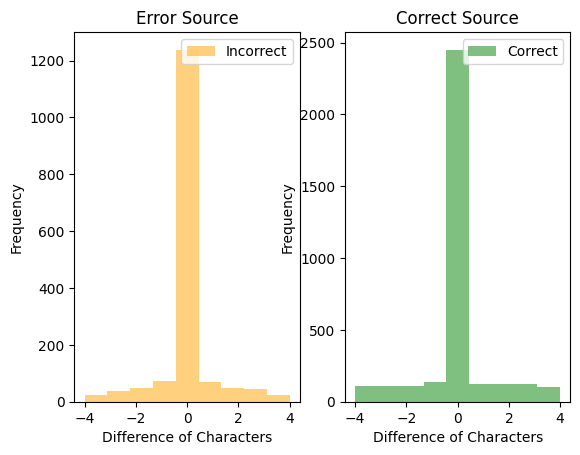

In [85]:
import matplotlib.pyplot as plt

# Sample data (replace with your actual data)
data1 = [correct[i][0].sum() for i in range(len(correct))]
data2 = [incorrect[i][0].sum() for i in range(len(incorrect))]




# Create the histograms with transparency and different colors
# plt.hist(data1, bins=10, alpha=0.5, color='blue', label='Correct')
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.hist(data2, bins=9, alpha=0.5, color='orange', label='Incorrect')


ax1.set_xlabel('Difference of Characters')
ax1.set_ylabel('Frequency')
ax1.set_title('Error Source')
ax1.legend()

ax2.hist(data1, bins=9, alpha=0.5, color='green', label='Correct')
ax2.set_xlabel('Difference of Characters')
ax2.set_ylabel('Frequency')
ax2.set_title('Correct Source')
ax2.legend()
plt.show()


# MSD

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


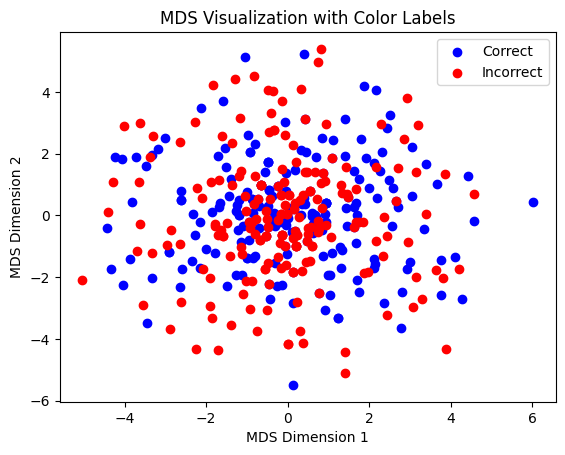

In [64]:
from sklearn.manifold import MDS

# Generate random vectors of length 20 for two lists
np.random.seed(0)
list1 = [correct[i][0] for i in range(200)]  # 20 vectors of length 20
list2 = [incorrect[i][0] for i in range(200)]  # 20 vectors of length 20

# Combine the lists and create labels
data = np.vstack([list1, list2])
labels = np.array([0]*len(list1) + [1]*len(list2))  # Labels 0 for list1, 1 for list2

# Perform MDS to reduce dimensions to 2D
mds = MDS(n_components=2, random_state=0)
mds_result = mds.fit_transform(data)

# Separate MDS results for each list
mds_list1 = mds_result[:len(list1)]
mds_list2 = mds_result[len(list1):]

# Plot the MDS results with labels
plt.scatter(mds_list1[:, 0], mds_list1[:, 1], c='blue', label='Correct')
plt.scatter(mds_list2[:, 0], mds_list2[:, 1], c='red', label='Incorrect')
plt.xlabel('MDS Dimension 1')
plt.ylabel('MDS Dimension 2')
plt.title('MDS Visualization with Color Labels')
plt.legend()
plt.show()


# Distribution of correct Answers

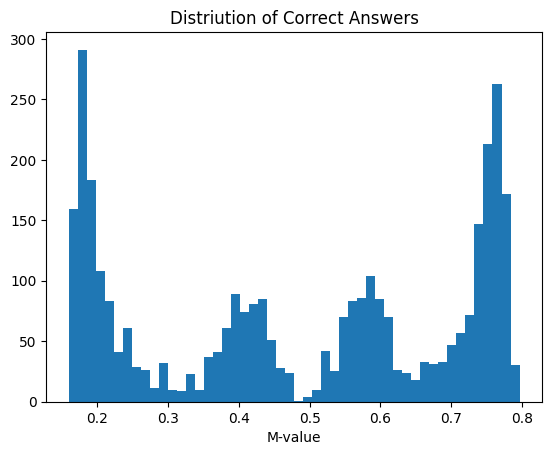

In [34]:
import matplotlib.pyplot as plt
import numpy as np

c_data = [correct[i][2] for i in range(len(correct)) ]
labels = ['Correct' , 'Incorrect']

i_data = [incorrect[i][2] for i in range(len(incorrect)) ]

plt.hist(c_data, bins = 50, )

plt.xlabel('M-value')
plt.title('Distriution of Correct Answers')
plt.show()



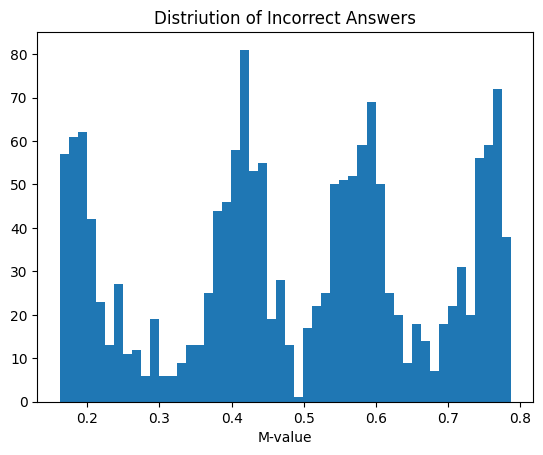

In [35]:
plt.hist(i_data, bins = 50, )

plt.xlabel('M-value')
plt.title('Distriution of Incorrect Answers')
plt.show()

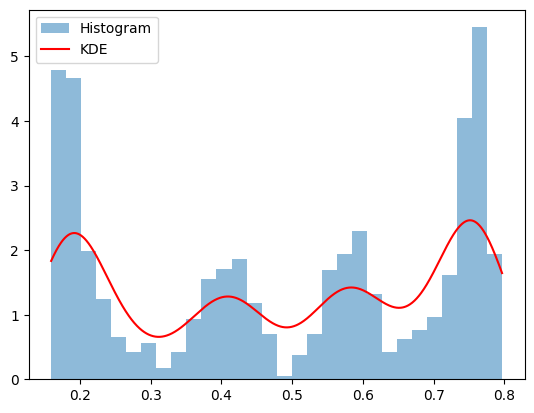

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Sample data
data = c_data

# Create histogram
hist, bins = np.histogram(data, bins=30, density=True)

# Perform KDE
kde = gaussian_kde(data)

# Plot histogram and KDE
plt.hist(data, bins=bins, density=True, alpha=0.5, label='Histogram')
cx_vals = np.linspace(min(data), max(data), 1000)
plt.plot(cx_vals, kde(cx_vals), 'r-', label='KDE')
plt.legend()
plt.show()


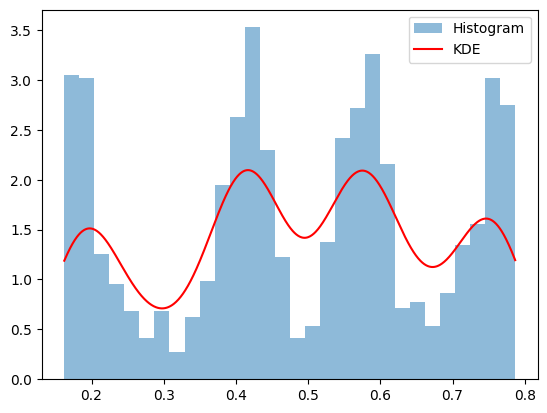

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Sample data
data = i_data

# Create histogram
hist, bins = np.histogram(data, bins=30, density=True)

# Perform KDE
kde = gaussian_kde(data)

# Plot histogram and KDE
plt.hist(data, bins=bins, density=True, alpha=0.5, label='Histogram')
ix_vals = np.linspace(min(data), max(data), 1000)
plt.plot(ix_vals, kde(ix_vals), 'r-', label='KDE')
plt.legend()
plt.show()

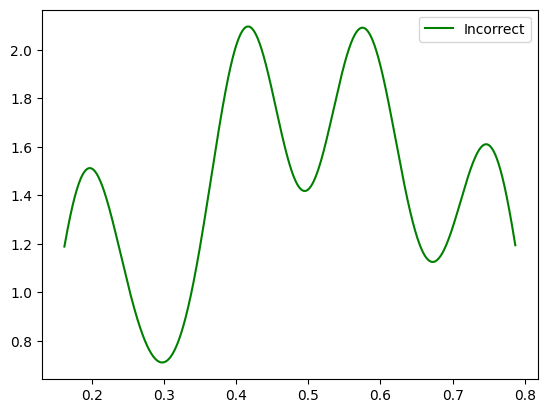

In [51]:
plt.plot(ix_vals, kde(ix_vals), 'g', label='Incorrect')
# plt.plot(cx_vals, kde(cx_vals), 'r', label='Correct')

plt.legend()
plt.show()
